In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# blur

In [77]:
from backend import blurring

In [78]:
blur_gray = blurring.Blur("./files/test_images/lena.png")
blur_color = blurring.Blur("./files/test_images/lena.png", color=True)

blur_gray.fit(100)
blur_color.fit(100)

./files/test_images/lena.png

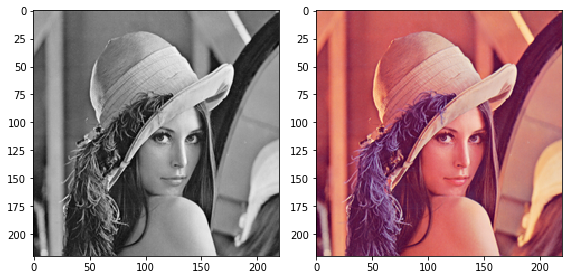

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(blur_gray.data_copy, plt.cm.gray)
axes[1].imshow(blur_color.data_copy)
fig.tight_layout()

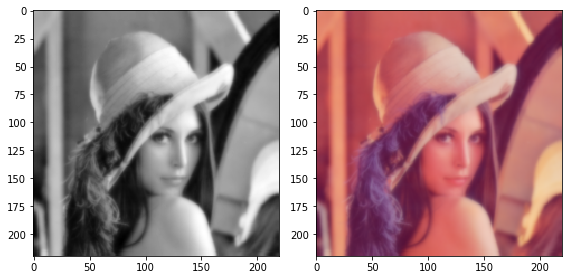

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(blur_gray.data, plt.cm.gray)
axes[1].imshow(blur_color.data)
fig.tight_layout()

# inpaiting

## Grayscale

In [42]:
from backend import inpaiting

In [43]:
inpaint = inpaiting.Inpaint("./files/test_images/lena.png")
_ = inpaint.destroy_information()
_ = inpaint.fit(epochs=100)

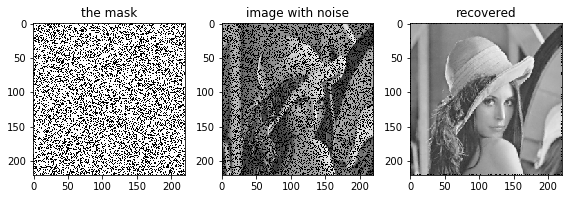

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
axes[0].imshow(inpaint.mask, plt.cm.gray)
axes[0].set_title("the mask")
axes[1].imshow(inpaint.original_data_copy, plt.cm.gray)
axes[1].set_title("image with noise")
axes[2].imshow(inpaint.data, plt.cm.gray)
axes[2].set_title("recovered")
fig.tight_layout()

## Color

In [45]:
inpaint = inpaiting.Inpaint("./files/test_images/lena.png", color=True)
_ = inpaint.destroy_information()
_ = inpaint.fit(epochs=100)

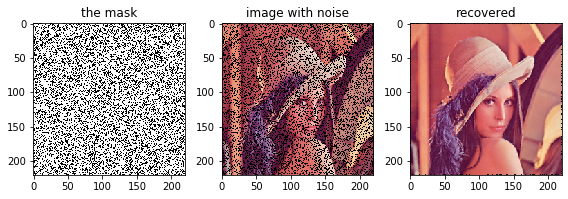

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
axes[0].imshow(inpaint.mask, plt.cm.gray)
axes[0].set_title("the mask")
axes[1].imshow(inpaint.original_data_copy, plt.cm.gray)
axes[1].set_title("image with noise")
axes[2].imshow(inpaint.data, plt.cm.gray)
axes[2].set_title("recovered")
fig.tight_layout()

# Contrasting

In [92]:
from backend import contrasting

## Grayscale

In [93]:
contrast = contrasting.Contrast('./files/test_images/contrast.jpg')
contrast.fit(100)

./files/test_images/contrast.jpg

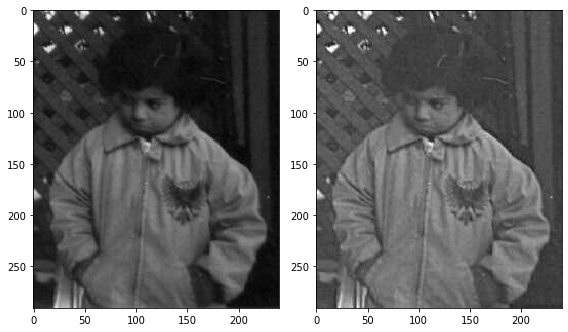

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(contrast.data_copy, plt.cm.gray)
axes[1].imshow(contrast.data, plt.cm.gray)
fig.tight_layout()

## Color

In [94]:
contrast = contrasting.Contrast('./files/test_images/contrast_color.jpg', True)
contrast.fit(100)

./files/test_images/contrast_color.jpg

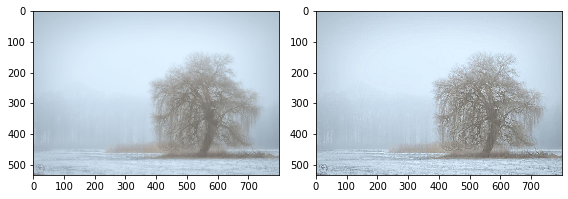

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(contrast.data_copy, plt.cm.gray)
axes[1].imshow(contrast.data, plt.cm.gray)
fig.tight_layout()

# Demosaicing

In [5]:
from backend import demosaicing

In [6]:
demosaic = demosaicing.Demosaic("./files/test_images/lena.png", color=True)

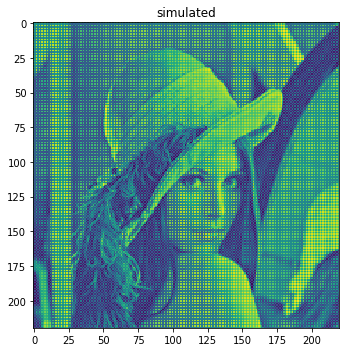

In [11]:
demosaic.simulate()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(demosaic.data)
axes.set_title("simulated")
fig.tight_layout()

In [8]:
demosaic.fit(100)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

./files/test_images/lena.png

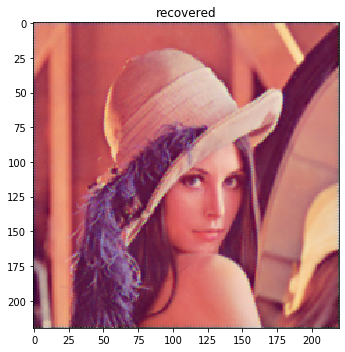

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(demosaic.data)
axes.set_title("recovered")
fig.tight_layout()

# Matting (sømløs-kloning)

In [13]:
from backend import matting

In [14]:
matt = matting.Matting()

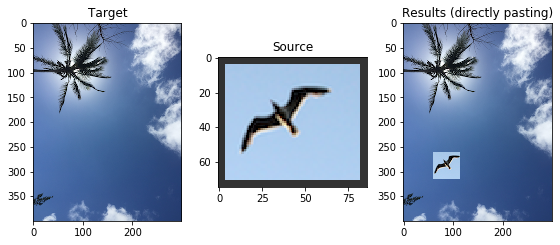

In [36]:
matt.reset()
matt.bad_fit()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
axes[0].imshow(matt.data_copy, plt.cm.gray)
axes[0].set_title("Target")
axes[1].imshow(matt.source.data, plt.cm.gray)
axes[1].set_title("Source")
axes[2].imshow(matt.data)
axes[2].set_title("Results (directly pasting)")
fig.tight_layout()

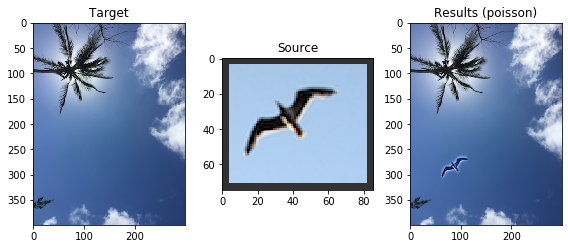

In [37]:
matt.reset()
matt.fit(500)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
axes[0].imshow(matt.data_copy, plt.cm.gray)
axes[0].set_title("Target")
axes[1].imshow(matt.source.data, plt.cm.gray)
axes[1].set_title("Source")
axes[2].imshow(matt.data)
axes[2].set_title("Results (poisson)")
fig.tight_layout()

# Grayscale converter

In [43]:
from backend import grayscale
from engine import image_handler
gray = grayscale.Grayscale("./files/test_images/lena.png", color=True)

In [44]:
gray.fit(100)

./files/test_images/lena.png

In [45]:
weighted_grayscale = image_handler.ImageHandler("./files/test_images/lena.png", False)

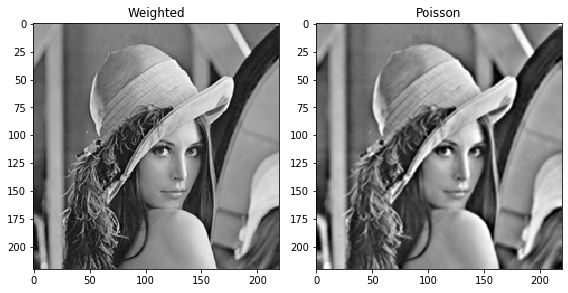

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(weighted_grayscale.data, plt.cm.gray)
axes[0].set_title("Weighted")
axes[1].imshow(gray.data, plt.cm.gray)
axes[1].set_title("Poisson")
fig.tight_layout()

### error handling

In [50]:
gray = grayscale.Grayscale("./files/test_images/lena.png", color=False)

AssertionError: we can only grayscale images that have color

# Anonymizing

In [64]:
from backend import anonymizing
anon = anonymizing.Anonymous("./files/test_images/lena.png", color=False)

## Grayscale 

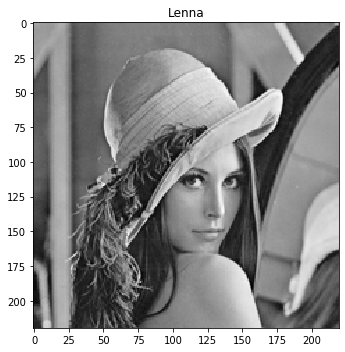

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(anon.data, plt.cm.gray)
axes.set_title("Lenna")
fig.tight_layout()

In [66]:
anon.fit(100)

./files/test_images/lena.png

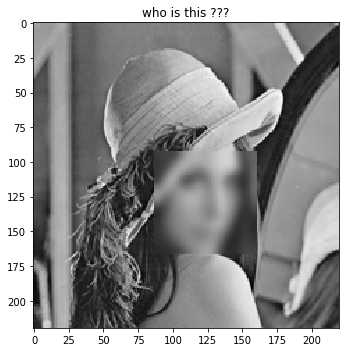

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(anon.data, plt.cm.gray)
axes.set_title("who is this ???")
fig.tight_layout()

## Color

In [ ]:
anon = anonymizing.Anonymous("./files/test_images/lena.png", color=True)

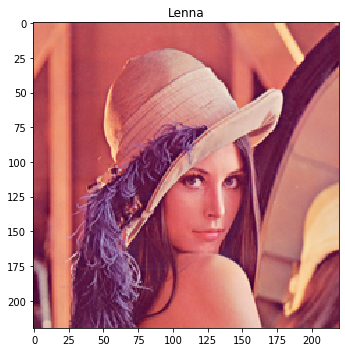

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(anon.data, plt.cm.gray)
axes.set_title("Lenna")
fig.tight_layout()

In [60]:
anon.fit(100)

./files/test_images/lena.png

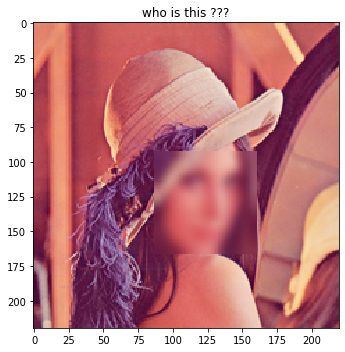

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(anon.data, plt.cm.gray)
axes.set_title("who is this ???")
fig.tight_layout()

# HDR

In [68]:
from engine import hdr_image_handler
from backend import reconstruction_HDR
from backend import inpaiting

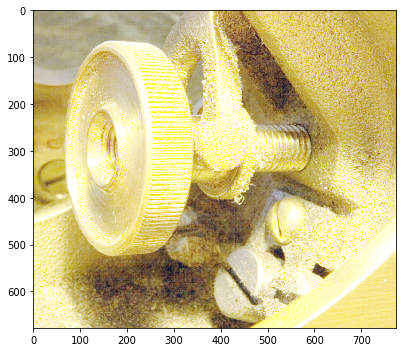

In [73]:
HDR = reconstruction_HDR.ReconstructionHDR()
HDR.fit()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(HDR.data, plt.cm.gray)
fig.tight_layout()

## custom images

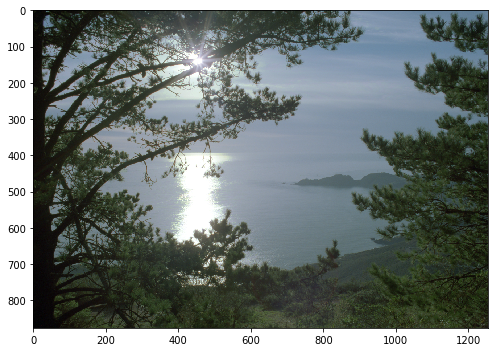

In [71]:
HDR = reconstruction_HDR.ReconstructionHDR([
		image_handler.ImageHandler('../hdr-bilder/Ocean/Ocean_00064.png'),
		image_handler.ImageHandler('../hdr-bilder/Ocean/Ocean_00128.png'),
		image_handler.ImageHandler('../hdr-bilder/Ocean/Ocean_00256.png'),
		image_handler.ImageHandler('../hdr-bilder/Ocean/Ocean_00512.png')
	])
HDR.fit()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(HDR.data, plt.cm.gray)
fig.tight_layout()

# Edge preserving blur

In [74]:
from backend import non_edge_blurring

## Grayscale

In [88]:
edge_blur_gray = non_edge_blurring.NonEdgeBlur("./files/test_images/lena.png", color=False)
edge_blur_gray.fit(epochs=30)

./files/test_images/lena.png

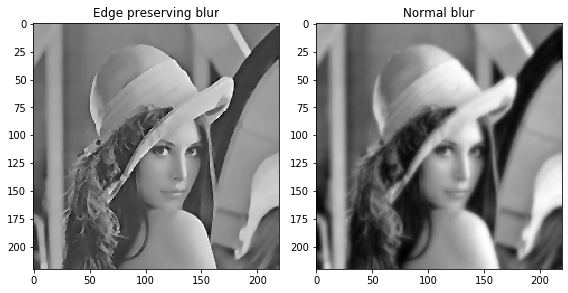

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(edge_blur_gray.data, plt.cm.gray)
axes[0].set_title("Edge preserving blur")

axes[1].imshow(blur_gray.data, plt.cm.gray)
axes[1].set_title("Normal blur")

fig.tight_layout()


## Color

In [90]:
edge_blur = non_edge_blurring.NonEdgeBlur("./files/test_images/lena.png", color=True)
edge_blur.fit(epochs=30)

./files/test_images/lena.png

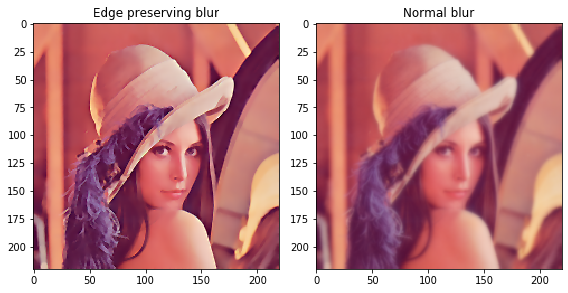

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(edge_blur.data, plt.cm.gray)
axes[0].set_title("Edge preserving blur")

axes[1].imshow(blur_color.data, plt.cm.gray)
axes[1].set_title("Normal blur")

fig.tight_layout()